# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np

# data viz
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# data prep
from sklearn.model_selection import train_test_split

# are these needed?
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# regression models
from sklearn.linear_model import LogisticRegression  # is this needed?
# to create trees (predictions)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# visualize trees
from sklearn import tree
# tune parameters
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

In [4]:
# get data and check structure
df= pd.read_csv('C:/Users/jeske/Documents/MIT Applied Data Sci/MIT ADSP Elective Projects/Practical DS/ExtraaLearn.csv')
df.head(2)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0


In [5]:
df.shape

(4612, 15)

In [6]:
# create backup... just in case
df_copy=df.copy()

## Data Overview

- Observations
- Sanity checks

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observation:** No missing data

In [8]:
# get basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations:**
- Age is skewed left
- Website visits looks to be skewed right, potentially with some outliers
- Time spent on website varies widely and is skewed right
- Page views per visit seems to track with time spent

In [9]:
# check for duplicates
df.duplicated().sum()

0

In [10]:
# look at distribution of data within weach variable
cat_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 
           'print_media_type2', 'digital_media', 'educational_channels', 'referral']

for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

In [11]:
# look at distribution of categorical variables as proportions
cat_col = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 
           'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']

for column in cat_col:
    print(df[column].value_counts(1))
    print("-" * 50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, 

### Observations
- Referrals make up small proportion of leads. Is it incentivized? Is it easy for new users to put in referrer?
- Only 30% of leas have converted to paying users. Is this expected? Would a student discount change this?
- Educational channels seem to have generated more leads than other individual channels
- Almost all users have filled out at least half of their profile; roughly have have completed >75%
- High profile completion would suggest interest or intent, but conversion rate is low
- More than half of leads are employed - who is the target consumer?

In [12]:
df['ID'].nunique()

4612

**Observation:** All IDs are unique, can be dropped

In [13]:
# drop ID column, not needed
df.drop('ID', axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

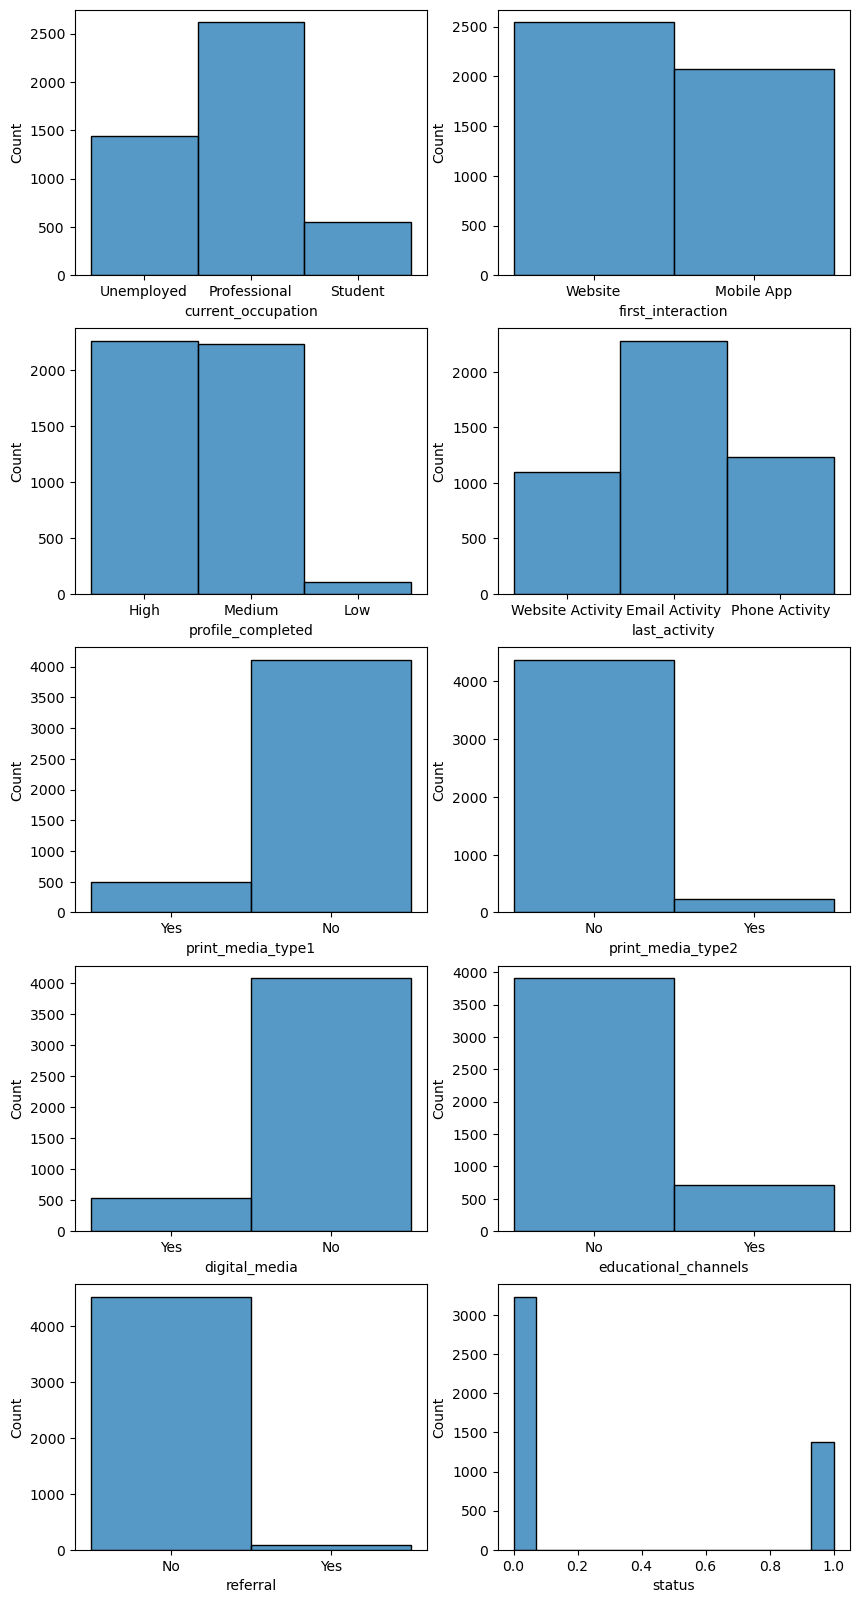

In [14]:
# create 5x2 grid and plot distributions for each categorical variable
# visually display the output from value_counts()

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10,20))
for i in range(10):
    sns.histplot(df, x=cat_col[i], ax=axs[i//2, i%2]) # use list index to position subplot
plt.show()

**Observations:**
- There are more professionals than students and unemployed leads combined
- Slightly more leads via website than mobile app for initial interaction
- Very few leads have a low amount of profile completed; otherwise it is split about even between medium (50-75%) and high (75-100%)
- Email is most frequent contact for their last activity, roughly the same as website and phone combined
- For most types of media, the number of leads generated is low, though the highest is educational channels
- Very very few leads come through referrals
- Less than 1/3 of leads have converted

In [15]:
def histogram_boxplot(data, feature, figsize=(10, 6), kde=False):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,6))
    kde: whether to the show density curve (default False)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.2, 0.8)},
        figsize = figsize,
    ) # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "skyblue") 
    # Boxplot will be created and a star will indicate the mean value of the column
    
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2) # For histogram
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--") # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color = "black", linestyle = "-") # Add median to the histogram

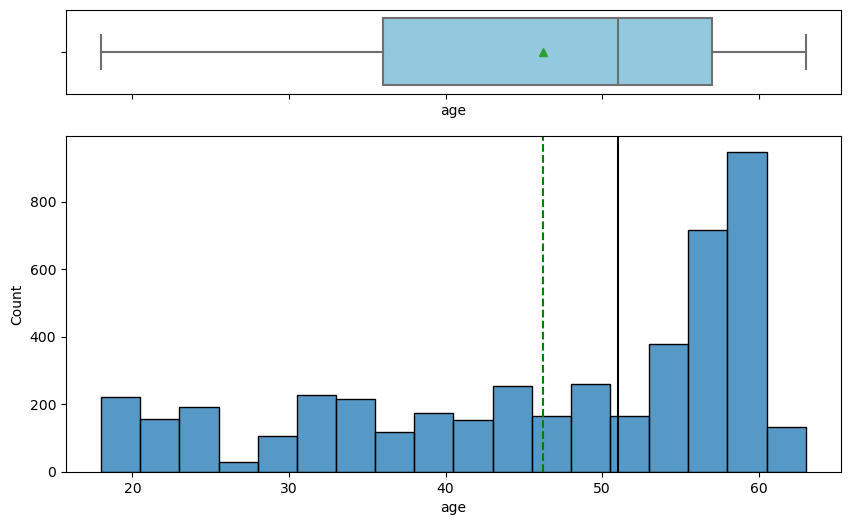

In [16]:
histogram_boxplot(df, 'age')

**Observations:**
Looking at the age distribution, I'm wondering what the target audience is for ExtraaLearn and what type of content they have. The peak for users 50+  might suggest (late) career changes or people who are lifelong learners. Would be useful to know what type of content they have viewed or searched for on the site. It could also be that this segment has the available time (not in school, no kids at home) or more discretionary income.

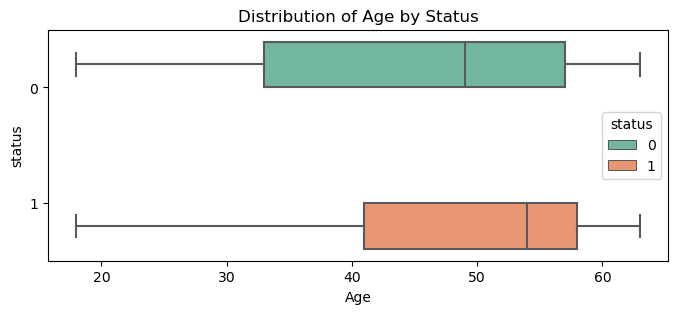

In [17]:
plt.figure(figsize = (8,3))
plt.title('Distribution of Age by Status')
sns.boxplot(data=df, x='age', y='status', orient='h', hue='status', palette='Set2')
plt.xlabel('Age');

**Observations:**
Some difference in the distribution of ages by leads that have converted and those that have not. Leads that are older, age-wise, may be more likely to convert to paid users.

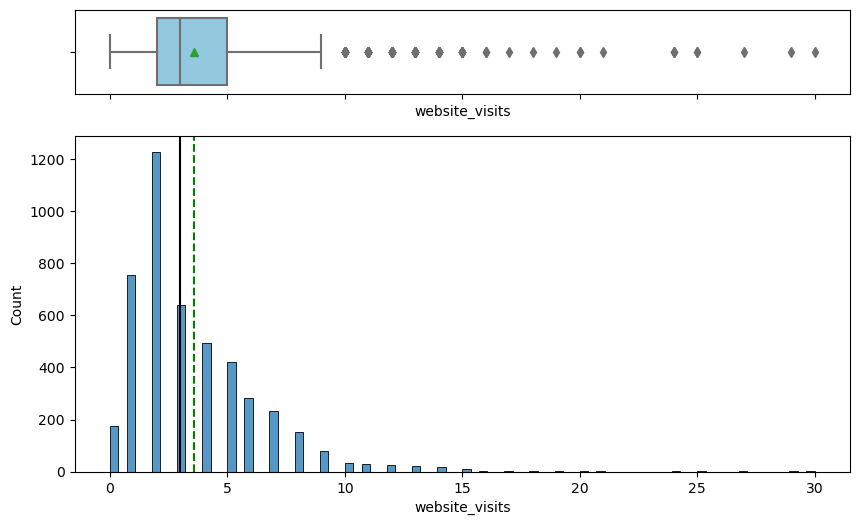

In [18]:
histogram_boxplot(df, 'website_visits')

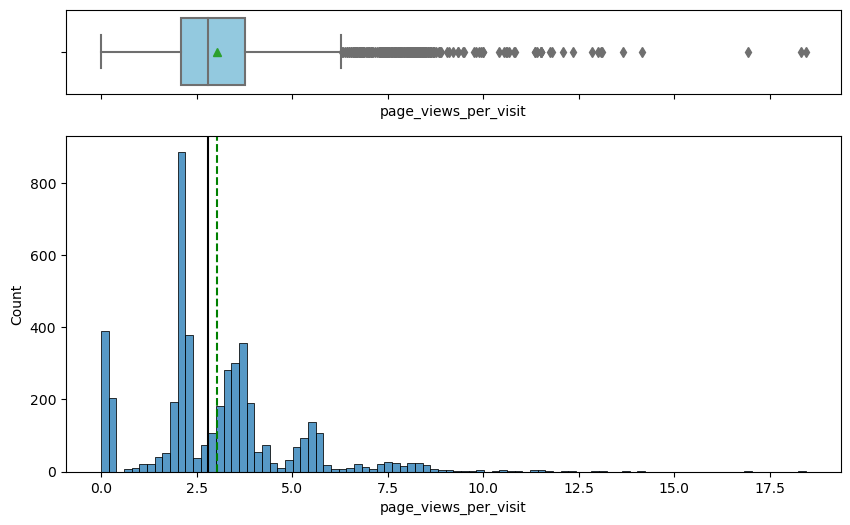

In [19]:
histogram_boxplot(df, 'page_views_per_visit')

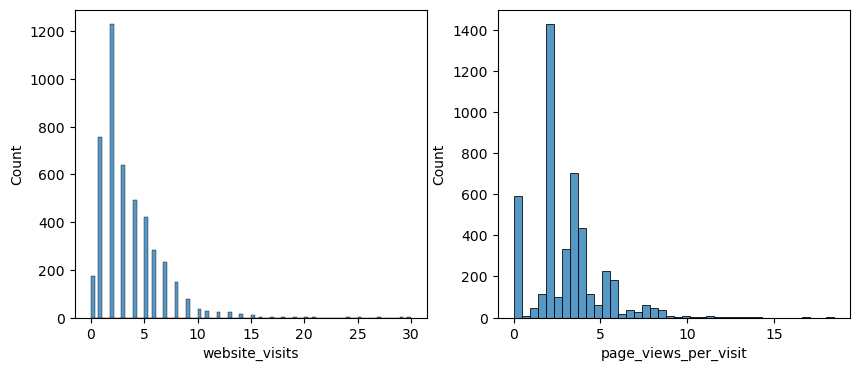

In [20]:
# create 1x2 grid of subplots
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
sns.histplot(df, x='website_visits', ax=axs[0])
sns.histplot(df, x='page_views_per_visit', bins=40, ax=axs[1]);

**Observations:**
Distribution for # website visits looks about how I expected based on the dscriptive stats above. The distribution for page views per visit is interesting, with several peaks. I wonder if there are certain actions users are taking or specific reasons they visit the website that involve navigating through a certain number of screens.

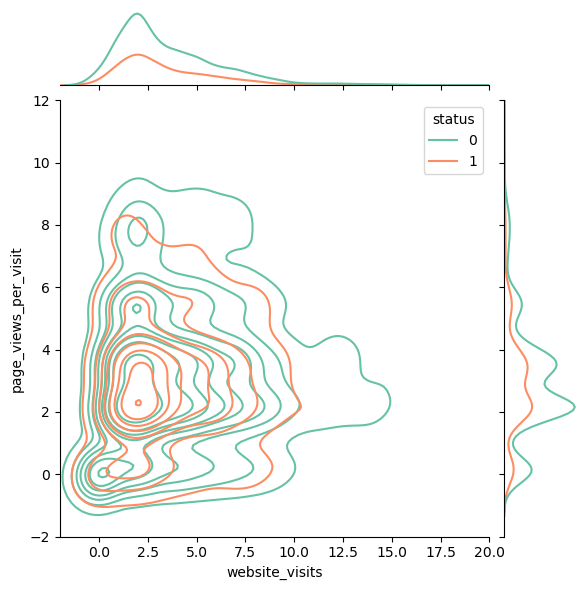

In [21]:
# How do website visits and page views per visit relate?
sns.jointplot(df, x='website_visits', y='page_views_per_visit', hue='status', palette='Set2', kind='kde')
plt.xlim(-2, 20)
plt.ylim(-2, 12)
plt.show()

**Observations:**
No obvious differences is website visit or page views per visit distribution by status.

In [22]:
# It looks like there are some leads who have never visited the website
# How many? Have they converted?
print('Leads who have never visited website:')
print(df[df['website_visits']==0].status.value_counts())
print('\nLeads who have visited website:')
print(df[df['website_visits']>0].status.value_counts())

Leads who have never visited website:
status
0    142
1     32
Name: count, dtype: int64

Leads who have visited website:
status
0    3093
1    1345
Name: count, dtype: int64


**Observations:**
Not surprisingly, leads who have not visited the website are less likely to have converted. Are these people that have only used mobile? I would be interesting to see how many times they have used the mobile app. Is the mobile experience worse than the website? Is it a different dempgraphic? (Need more data for that)

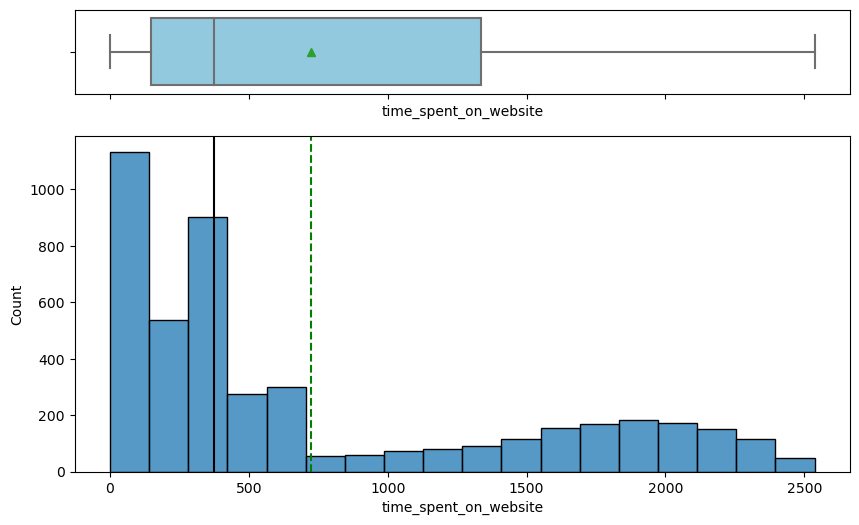

In [23]:
histogram_boxplot(df, 'time_spent_on_website')

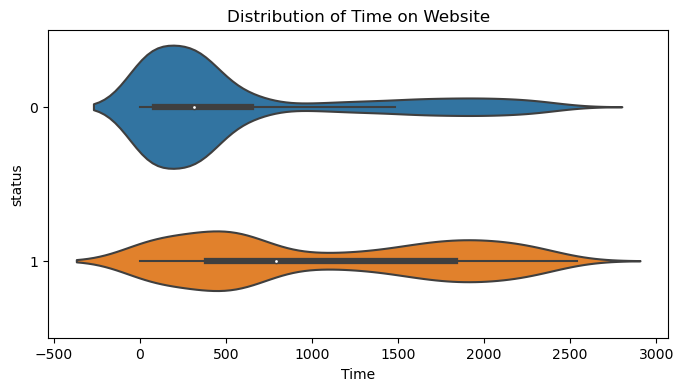

In [24]:
plt.figure(figsize = (8,4))
plt.title('Distribution of Time on Website')
sns.violinplot(data=df, x='time_spent_on_website', y='status', orient='h')
plt.xlabel('Time');

**Observations:**
Different distributions of time spent on website by users who have/have not converted. Although both groups have some users that have spent >1000 (minutes?) on the site, this is a much smaller proportion of the nont convertd segment.

In [25]:
# Function for getting counts, % and plot of user status by a feature
def status_by_feature(data, feature):
    """
    data = dataframe
    feature = variable of interest
    Plots out how different levels of a feature relate to target
    """
    ft_levels=list(data[feature].value_counts().index)  # levels of feature
    
    # iterate through levels of feature for count and conversion rate for each
    for i in ft_levels:
        print(f'{i} Counts:', data[data[feature]==i].status.count())
        print(f'{i} Conversion% :', round(data[data[feature]==i].status.mean()*100, 2))
        print("-" * 50)

    # generate chart to display the distribution of levels within the feature
    sns.countplot(data, x=feature, hue='status', palette='Paired')
    plt.ylabel('# of Leads')
    plt.show()

Professional Counts: 2616
Professional Conversion% : 35.51
--------------------------------------------------
Unemployed Counts: 1441
Unemployed Conversion% : 26.58
--------------------------------------------------
Student Counts: 555
Student Conversion% : 11.71
--------------------------------------------------


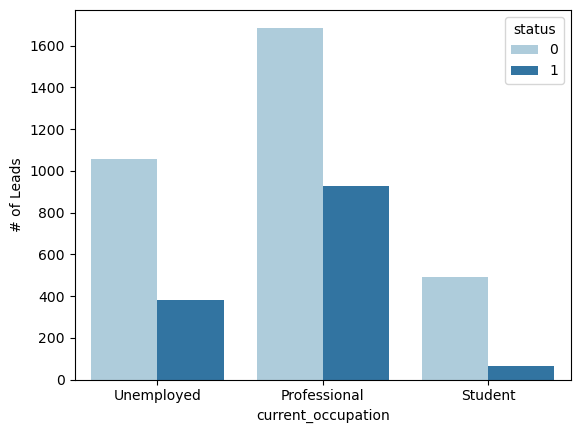

In [26]:
# Find out how current occupation affects lead status
status_by_feature(df, 'current_occupation')

**Observation:** Professionals are more likely to convert to paid users than students or unemployed

''

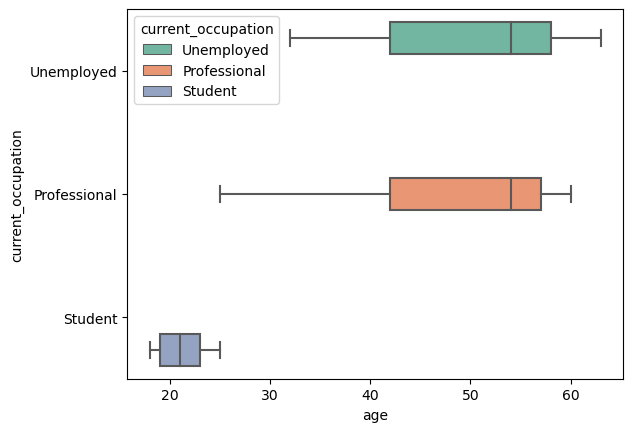

In [27]:
# There is probably a difference in ages for these occupation groups
sns.boxplot(df, x='age', y='current_occupation', hue='current_occupation', palette='Set2')
;

**Observations:**
Not surprisingly, age of students is quite different from the other 2 groups, spanning just 18-25. Age range of professionals is greater than that of unemployed, but median is roughy equal between these groups.

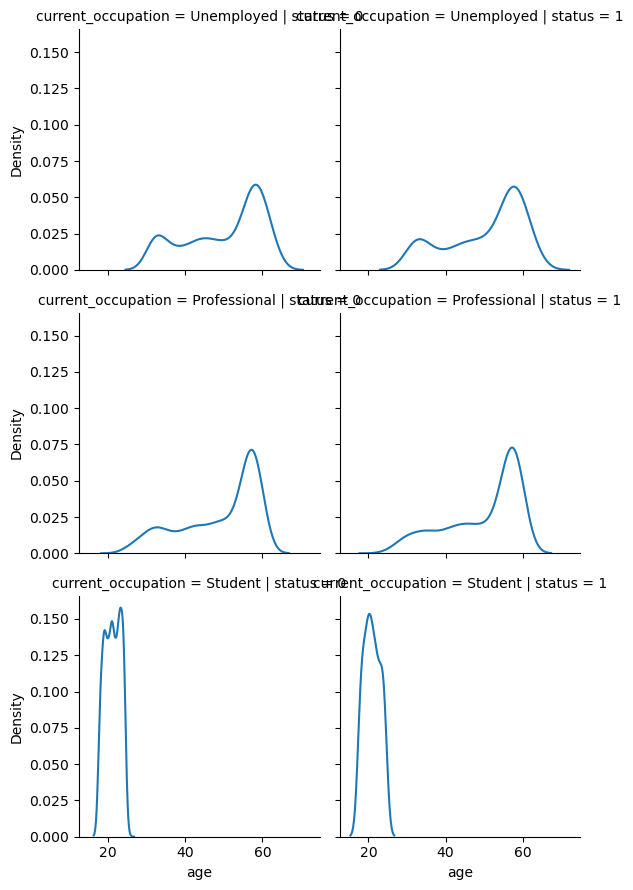

In [28]:
g=sns.FacetGrid(data=df, row='current_occupation', col='status')
g.map(sns.kdeplot, 'age')

**Observations:**
Within each occupation, the age distribution is similar between leads that have converted and those that have not

Website Counts: 2542
Website Conversion% : 45.59
--------------------------------------------------
Mobile App Counts: 2070
Mobile App Conversion% : 10.53
--------------------------------------------------


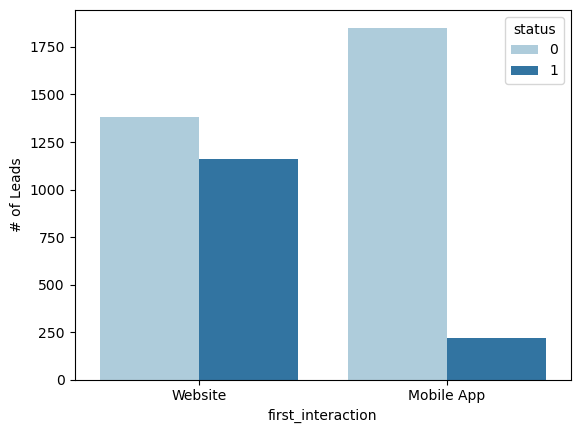

In [29]:
# Does the first channel of interaction have an impact on the lead status?
# first_interaction (Website, Mobile App)

status_by_feature(df, 'first_interaction')

**Observation:**
Marked difference in conversion rates based on initial interaction. It's possible that these 2 groups represent different populations, ie. one has many more professionals.

In [30]:
# Is there a difference in occupation distribution between web and mobile first interaction groups?
df[['first_interaction', 'current_occupation']].groupby('first_interaction').value_counts()

first_interaction  current_occupation
Mobile App         Professional          1191
                   Unemployed             642
                   Student                237
Website            Professional          1425
                   Unemployed             799
                   Student                318
Name: count, dtype: int64

**Observation:** No big differences in occupation between mobile/web first interaction

Email Activity Counts: 2278
Email Activity Conversion% : 30.33
--------------------------------------------------
Phone Activity Counts: 1234
Phone Activity Conversion% : 21.31
--------------------------------------------------
Website Activity Counts: 1100
Website Activity Conversion% : 38.45
--------------------------------------------------


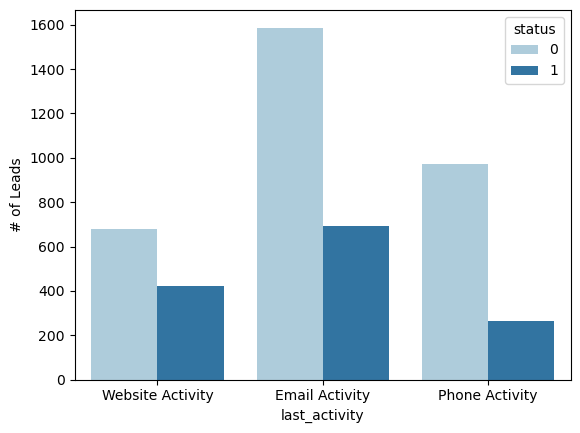

In [31]:
# The company uses multiple modes to interact with prospects.
# Which way of interaction works best?
# last_activity (Email, Phone, Website)

# assuming "best" = highest conversion rate
status_by_feature(df, 'last_activity')

**Observations:**
Interaction through the website appears to b most successful, while interactions over the phone is least successful in converting leads.

print_media_type1 conversion rate % 31.99
print_media_type2 conversion rate % 32.19
digital_media conversion rate % 31.88
educational_channels conversion rate % 27.94


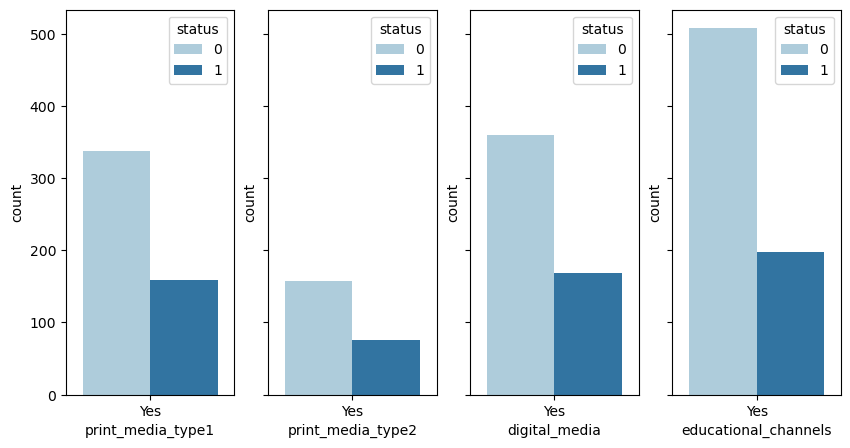

In [32]:
# The company gets leads from various channels such as print media, digital media, referrals, etc 
# Which of these channels have the highest lead conversion rate?
# type1=newspaper, type2=magazine, digital, educational_channels, referral
# Are these mutually exclusive? No

# Let's look at each of these 4 channels side-by-side, broken out by status to see how they compare
media_col = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels']

# calculate and print conversion rate for each column (media channel)
for column in media_col:
    print(column, 'conversion rate %', round(df[df[column]=='Yes'].status.mean()*100, 2))

# and now to plot them
fig, axs = plt.subplots(ncols=4, figsize=(10,5), sharey=True)
sns.set_palette('Paired')
sns.countplot(df[df['print_media_type1']=='Yes'], x='print_media_type1', hue='status', ax=axs[0])
sns.countplot(df[df['print_media_type2']=='Yes'], x='print_media_type2', hue='status', ax=axs[1])
sns.countplot(df[df['digital_media']=='Yes'], x='digital_media', hue='status', ax=axs[2])
sns.countplot(df[df['educational_channels']=='Yes'], x='educational_channels', hue='status', ax=axs[3])
plt.show()

**Observations:**
Conversion rates for the 4 different categories of media platforms. Conversion rate for educational channels is a bit lower than for others, but it also has generated the greatest number of lead (either in whole or in part).
This does ignore the small number of leads from these sources that are also referrals.

High Counts: 2264
High Conversion% : 41.78
--------------------------------------------------
Medium Counts: 2241
Medium Conversion% : 18.88
--------------------------------------------------
Low Counts: 107
Low Conversion% : 7.48
--------------------------------------------------


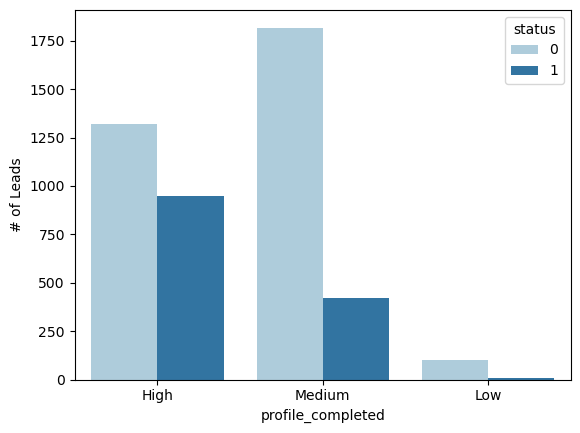

In [33]:
# Does having more details about a prospect increase the chances of conversion?
# profile_conpleted: Low - (0-50%), Medium - (50-75%), High (75-100%)

status_by_feature(df, 'profile_completed')

**Observations:**
Leads who complete >75% of their profile are more invested in the website/product, specifically those with 50-75% of profile completed (medium).

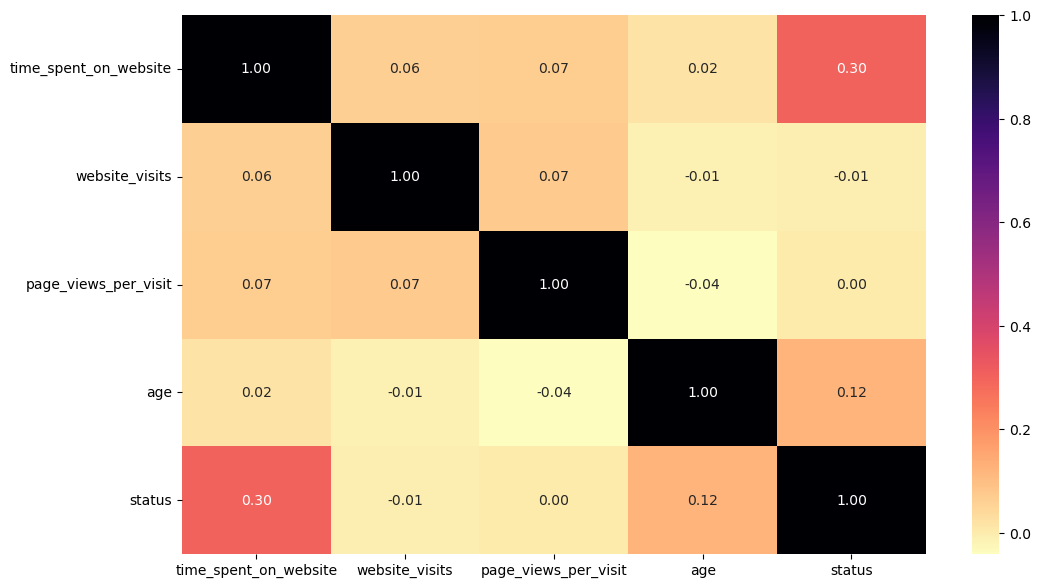

In [34]:
# checking heatmap of numerical variables
plt.figure(figsize = (12, 7))
sns.heatmap(df[['time_spent_on_website', 'website_visits', 'page_views_per_visit', 'age', 'status']].corr(), 
            annot = True, fmt = '.2f', cmap='magma_r')
plt.show()

**Observations:**
Most of the numeric variables have no correlation with status, except time spent on websit which has a weak correlation with status. We can expect to see time spent on website as being important to a classification model.

In [35]:
# make media channels binary
df['newspaper'] = df['print_media_type1'].apply(lambda x: 1 if x=='Yes' else 0)
df['magazine'] = df['print_media_type2'].apply(lambda x: 1 if x=='Yes' else 0)
df['digital'] = df['digital_media'].apply(lambda x: 1 if x=='Yes' else 0)
df['educational'] = df['educational_channels'].apply(lambda x: 1 if x=='Yes' else 0)

# drop original columns
df.drop(['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels'], axis=1, inplace=True)

# check data
df.head(2)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,referral,status,newspaper,magazine,digital,educational
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,No,1,1,0,1,0
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,0,0,0,0,1


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [36]:
# No missing data

# Separating the target variable and other variables
X = df.drop(columns = 'status')
Y = df['status']

# Feature engineering needed for categorical variables: 
# current_occupation, first_interaction, last_activity, profile_completed
X = pd.get_dummies(X, drop_first=True)

# split into train/test, standard 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

## print out size of training/testing data
print("Shape of the training set: ", X_train.shape)   
print("Shape of the test set: ", X_test.shape)

# check distribution of target classes between train and test
print("\nPercentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("\nPercentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)

Percentage of classes in the training set:
status
0    0.702602
1    0.297398
Name: proportion, dtype: float64

Percentage of classes in the test set:
status
0    0.698699
1    0.301301
Name: proportion, dtype: float64


In [37]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3228.0,45.899318,13.323957,18.0,35.000,50.000,57.000,63.000
website_visits,3228.0,3.564436,2.883848,0.0,2.000,3.000,5.000,30.000
time_spent_on_website,3228.0,727.405824,750.512373,0.0,142.000,376.000,1353.000,2537.000
page_views_per_visit,3228.0,2.996815,1.952959,0.0,2.075,2.695,3.736,18.434
newspaper,3228.0,0.100991,0.301364,0.0,0.000,0.000,0.000,1.000
magazine,3228.0,0.049876,0.217723,0.0,0.000,0.000,0.000,1.000
digital,3228.0,0.115551,0.319736,0.0,0.000,0.000,0.000,1.000
educational,3228.0,0.152726,0.359779,0.0,0.000,0.000,0.000,1.000


In [38]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1384.0,46.905347,12.751380,18.0,37.00000,52.000,57.00000,63.000
website_visits,1384.0,3.572254,2.698219,0.0,2.00000,3.000,5.00000,25.000
time_spent_on_website,1384.0,716.093931,728.207993,0.0,161.75000,378.000,1301.50000,2531.000
page_views_per_visit,1384.0,3.094488,2.002095,0.0,2.08075,2.962,3.81925,16.914
newspaper,1384.0,0.123555,0.329192,0.0,0.00000,0.000,0.00000,1.000
magazine,1384.0,0.052023,0.222154,0.0,0.00000,0.000,0.00000,1.000
digital,1384.0,0.111272,0.314582,0.0,0.00000,0.000,0.00000,1.000
educational,1384.0,0.153179,0.360290,0.0,0.00000,0.000,0.00000,1.000


**Observation:** Stats for train and test data sets are similar. OK to proceed to building a model.

In [39]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):  
    print("Accuracy:", round(accuracy_score(actual, predicted), 4))
    print('\n')
    print(classification_report(actual, predicted))   
    cm = confusion_matrix(actual, predicted)   
    plt.figure(figsize = (6, 4))   
    sns.heatmap(cm, annot = True,  fmt = '.2f', cmap='Greens', 
                xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])   
    plt.ylabel('Actual')   
    plt.xlabel('Predicted')    
    plt.show()

## Building a Decision Tree model

In [40]:
dtree = DecisionTreeClassifier(random_state = 101)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

## Model Performance evaluation and improvement

Accuracy: 0.9997


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2268
           1       1.00      1.00      1.00       960

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



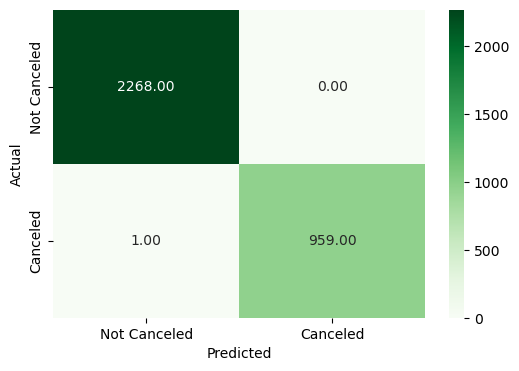

In [41]:
# how well does the decision tree fit to the training data?
y_pred_tr = dtree.predict(X_train)
metrics_score(y_train, y_pred_tr)

Accuracy: 0.8064


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       967
           1       0.68      0.66      0.67       417

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.80      0.81      0.81      1384



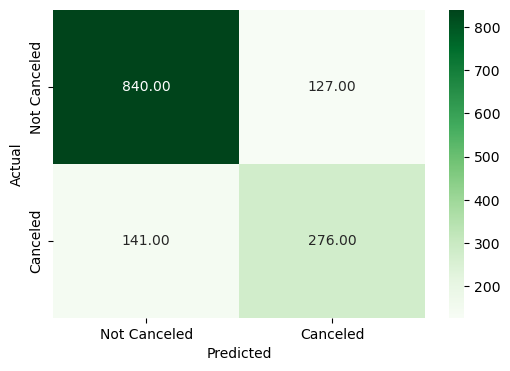

In [42]:
y_pred = dtree.predict(X_test)
metrics_score(y_test, y_pred)

**Outcome:**
From the classification report we see that there is perfect prediction performance with training data and lower accuracy for test data suggests over-fitting of model. Need to do some tuning of parameters.

In [43]:
# new tree, defined weights by target distribution (inverse -> balance)
dtree_tune = DecisionTreeClassifier(random_state = 101, class_weight = {0: 0.3, 1: 0.7})

# grid of parameters to choose from
params = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dtree_tune, params, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# select model with best combination of parameters
dtree_tune = grid_obj.best_estimator_

# fit "best" model
dtree_tune.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=101)

**Oservations:**
"Best" model from the grid search (contained by the selected parameters) has a depth of 3 and a minimum of 5 samples per leaf, using entropy. <br><br>
**Time to see how the tuned model performs**

Accuracy: 0.79


              precision    recall  f1-score   support

           0       0.95      0.74      0.83      2268
           1       0.60      0.90      0.72       960

    accuracy                           0.79      3228
   macro avg       0.77      0.82      0.78      3228
weighted avg       0.84      0.79      0.80      3228



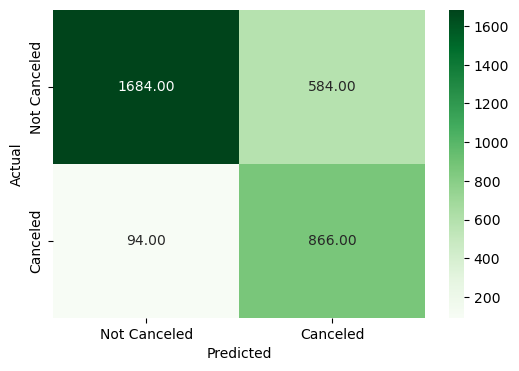

In [44]:
# assess performance on training data
y_pred_tr_tune = dtree_tune.predict(X_train)
metrics_score(y_train, y_pred_tr_tune)

Accuracy: 0.7883


              precision    recall  f1-score   support

           0       0.94      0.74      0.83       967
           1       0.60      0.90      0.72       417

    accuracy                           0.79      1384
   macro avg       0.77      0.82      0.77      1384
weighted avg       0.84      0.79      0.80      1384



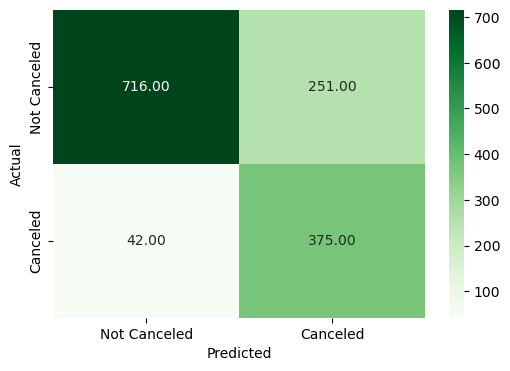

In [45]:
# assess performance on test data
y_pred_tune = dtree_tune.predict(X_test)
metrics_score(y_test, y_pred_tune)

**Observations:**
- This looks much better with performance for training and testing data roughly equal
- There are 2 ways leads can get misclassified: predicting a lead will convert and they do not, or predicting a lead will not convert and they do
- In the first case, the company might waste a small amount of resources trying to get them to convert
- In the second case, the company might "ignore" a lead that otherwise would have converted
- In business it's always easier/cheaper to retain customers than it is to get new ones, so it's best to minimize the false negatives (higher recall) - erring on the side of predicting a lead will convert
- This model is definitely better, but maybe it could be better...

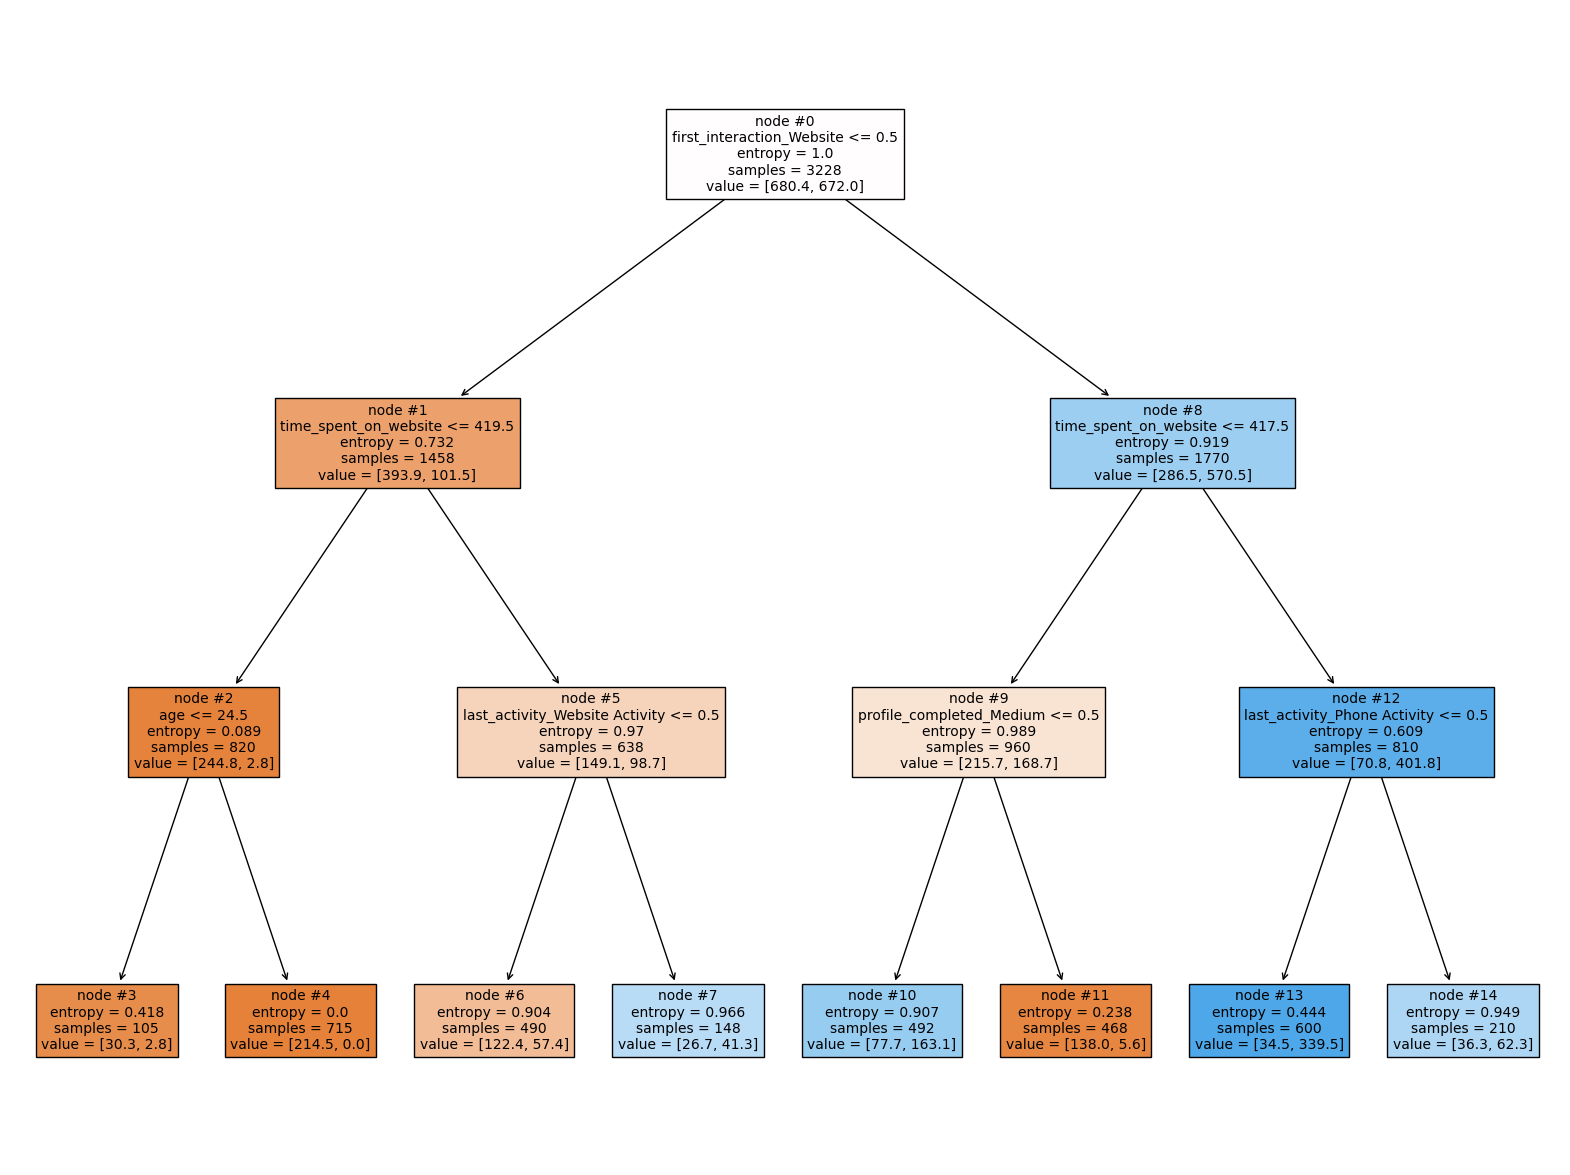

In [46]:
# Time to see what the tree actually looks like
# get columns names as features
features = list(X.columns)

plt.figure(figsize = (20, 15))
tree.plot_tree(dtree_tune, feature_names = features, filled = True, fontsize = 10, node_ids = True)
plt.show()

**Observations:**
- First split is on website or mobile for the first_interaction, indicating this is an important feature. This tracks with the EDA above, where the conversion rate for mobile app is much lower than for website
- Both nodes in the next layer use time spent on website for splitting, and iterestingly, both have about the same cut-off value (419.5, 417.5). Time spent on website had a bi-modal distribution, which was seen even when splitting the data by lead status although with different distributions.
- The next level uses age (<=24.5) - splitting out college students, last activity or profile completion.
- This means that a number of variables were not used in creating the tree at all: pages viewed per visit, occupation, website visits, lead sources.
- For this tree, blue cells represent converted leads; orange cells are non-converted leads. Color intensity is the "purity" of that leaf (ie, uniform or not)
- The split at node 2 seems unnecessary, as both lead to the same outcome.

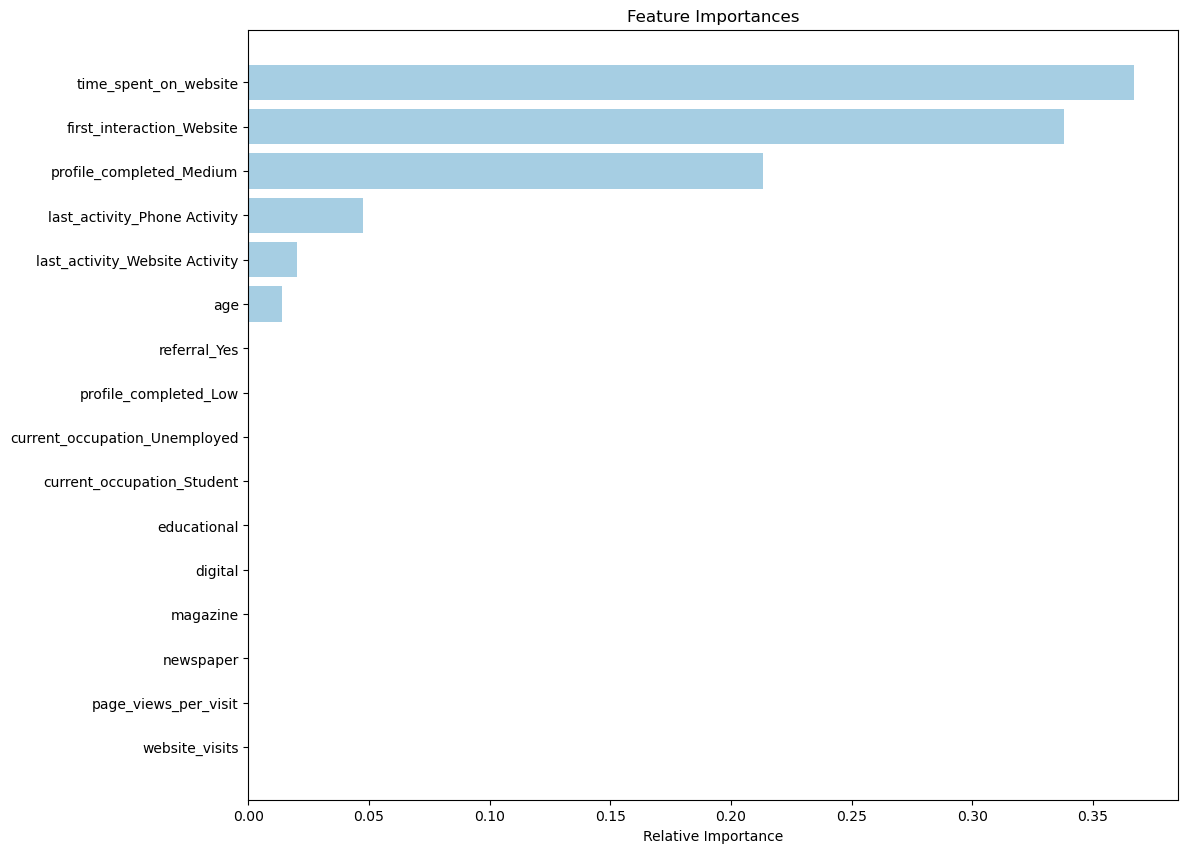

In [47]:
# How important are the features?
# get importance of each from model
imp_dtree = dtree_tune.feature_importances_

indices = np.argsort(imp_dtree)

# attach feature names
feature_names = list(X.columns)

plt.figure(figsize = (12, 10))
plt.title('Feature Importances')

# plot bars
plt.barh(range(len(indices)), imp_dtree[indices], align = 'center')

# label bars
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
This plot of feature importance mirrors the nodes in the tree above, with more than half of the original features having no importance.

## Building a Random Forest model

In [48]:
# Build Random Forest classifier - initial parameters should not be contraining models based on above results
rfc = RandomForestClassifier(n_estimators = 200, random_state=101, criterion='entropy', max_depth=8, min_samples_split=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=5,
                       n_estimators=200, random_state=101)

## Model Performance evaluation and improvement

Accuracy: 0.8919


              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2268
           1       0.85      0.77      0.81       960

    accuracy                           0.89      3228
   macro avg       0.88      0.86      0.87      3228
weighted avg       0.89      0.89      0.89      3228



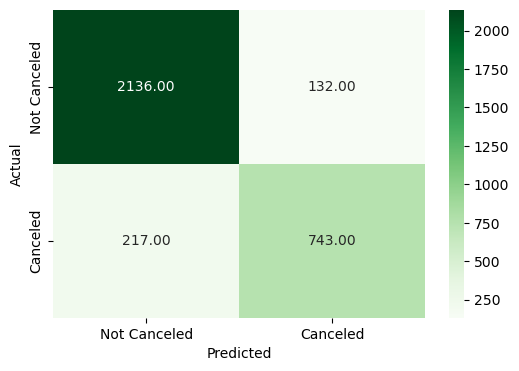

In [49]:
# assess performance on training data
y_pred_rfc_tr = rfc.predict(X_train)
metrics_score(y_train, y_pred_rfc_tr)

Accuracy: 0.8591


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       967
           1       0.82      0.68      0.75       417

    accuracy                           0.86      1384
   macro avg       0.85      0.81      0.82      1384
weighted avg       0.86      0.86      0.86      1384



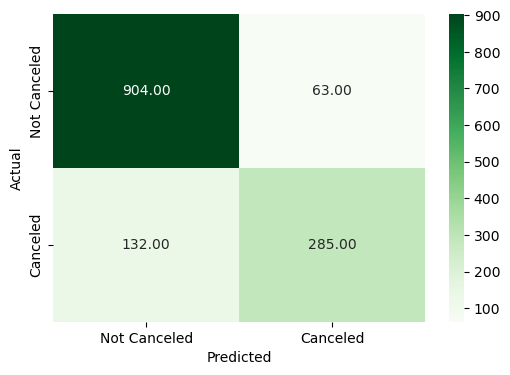

In [50]:
# assess performance on test data
y_pred_rfc = rfc.predict(X_test)
metrics_score(y_test, y_pred_rfc)

**Observations:**
Without tuning, the initial Random Forest Classifier is performing better than a single decision tree. Training data is fit a bit better by the model, so I'm slightly concerned about overfitting.

In [51]:
# Adjust hyperparameters of Randome Forest Classifier
# create new rfc
# sticking with entropy as it outperformed gini for the decision tree
rfc_tune = RandomForestClassifier(criterion = "entropy", random_state = 101)

# Grid of parameters to choose from
rfc_params = {"n_estimators": [80, 100, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1],
    "min_samples_split": [5, 10, 20],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rfc_tune, rfc_params, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rfc_tune = grid_obj.best_estimator_

In [52]:
# fit "best" model
rfc_tune.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, min_samples_split=20,
                       n_estimators=120, random_state=101)

Accuracy: 0.8603


              precision    recall  f1-score   support

           0       0.94      0.85      0.90      2268
           1       0.72      0.88      0.79       960

    accuracy                           0.86      3228
   macro avg       0.83      0.86      0.84      3228
weighted avg       0.87      0.86      0.86      3228



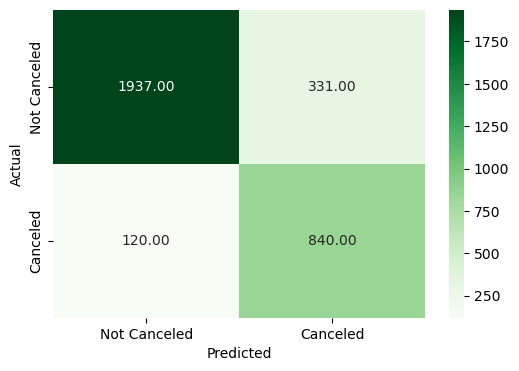

In [53]:
# evaluate model on training data
y_pred_rfc_tr = rfc_tune.predict(X_train)
metrics_score(y_train, y_pred_rfc_tr)

Accuracy: 0.8475


              precision    recall  f1-score   support

           0       0.92      0.86      0.89       967
           1       0.71      0.82      0.76       417

    accuracy                           0.85      1384
   macro avg       0.82      0.84      0.83      1384
weighted avg       0.86      0.85      0.85      1384



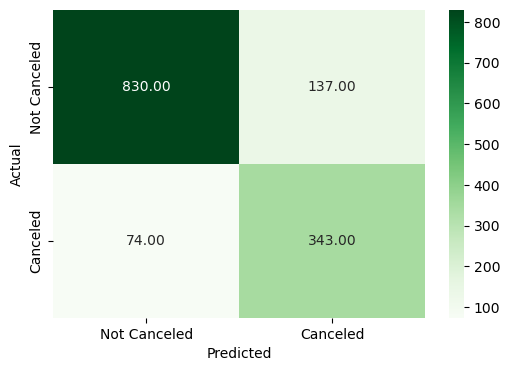

In [54]:
# evaluate model on test data
y_pred_rfc = rfc_tune.predict(X_test)
metrics_score(y_test, y_pred_rfc)

**Observations:**
Model after tuning parameters still performs about the same as inital Random Forest Classifier model.

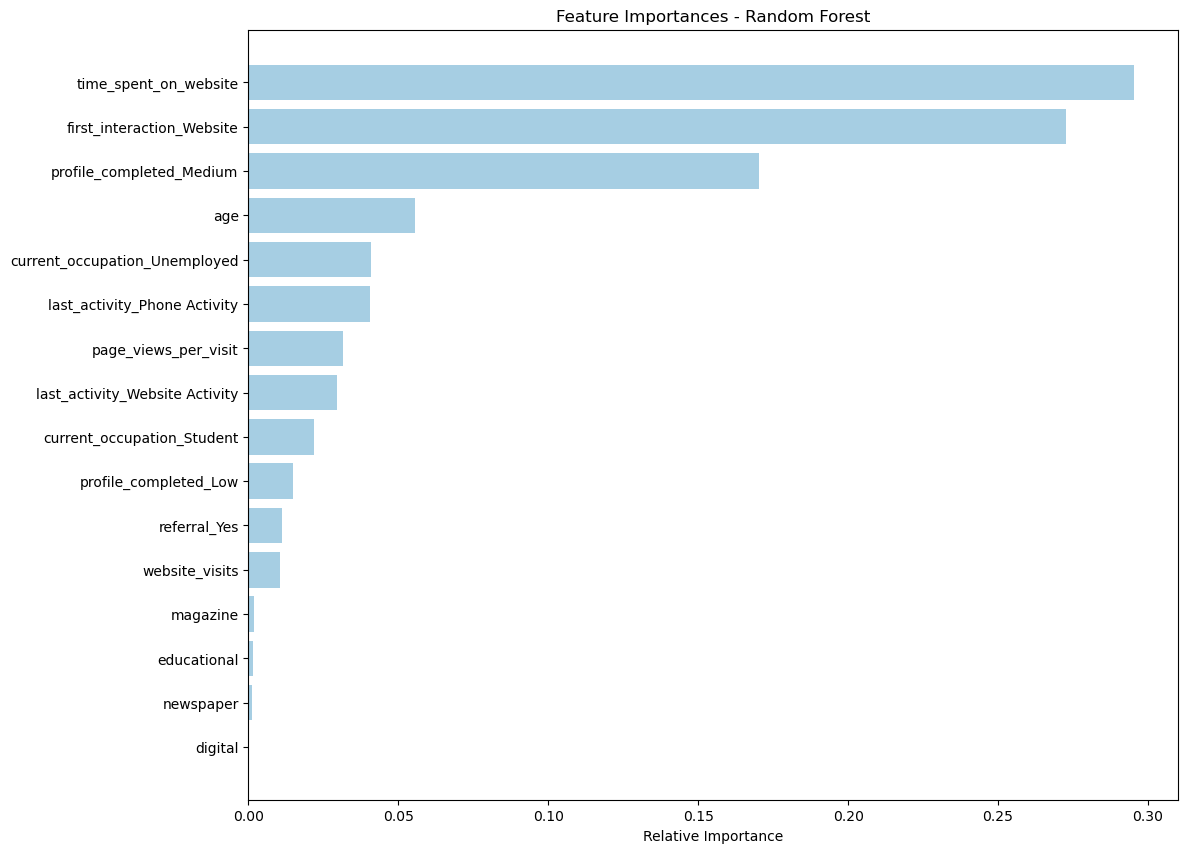

In [55]:
# How important are the features? Is it similar to the decision tree model?
# get importance of each from model
imp_rfc = rfc_tune.feature_importances_

indices = np.argsort(imp_rfc)

# attach feature names
feature_names = list(X.columns)

plt.figure(figsize = (12, 10))
plt.title('Feature Importances - Random Forest')

# plot bars
plt.barh(range(len(indices)), imp_rfc[indices], align = 'center')

# label bars
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
Random Forest model does place some importance on nearly all of the features, however time spent on website, first interaction (website) and profile complete (medium) are the key features in classifying leads.

## Actionable Insights and Recommendations

### Insights:
As far as the main factors that are related to (and predictive of) a lead churning are:
- Time spent on website (more)
- First interaction via website, not mobile
- Profile completion of 50-75%
<br>

Leads who fit this profile are more likely to convert and should be focused on for any marketing efforts aimed at leads. It should also be cautioned that pushing leads (or potential leads) to spend more time on the site, to have their first interaction on the website, or to complete more than half (but not all) of their profile may not improve conversion rate. These features are *associated* with an outcome, but may not be *causative* of it.<br><br>

### Recommendations:
1. More time spent on website is associated with lead conversion. Ensure that marketing/ads on the site are featured prominently; this might decrease time between lead creation and conversion.
2. Focus more on leads coming through the website as they are more likely to convert. This could mean more messaging, outreach, promotions, etc.
3. Around profile completion, based on the data there is likely messaging in place to encourage leads to fill out more in their profile. Once a lead crosses a certain threshold (might be 50%, might be more), that should also be a trigger that this lead is more likely to convert and effort should be focused there.
4. Not present in any of this is referrals. The raw number of referrals was too small to impact the models and too small to draw conclusions from. However, referrals tend to be a good way to generate more business. If they are not already, referrals should be incentivized to see if (a) referral rate increases and (b) what role it plays in conversion.